In [5]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

### Now that we updated our chart, we can graph our updated chart to see if it is a good time to buy or sell

#### We will use our code we already typed out in a previuos notebook, but now our csv file is our updated file

In [23]:
apple_chart = pd.read_csv('Updated AAPL Chart.csv')
apple_chart

,Adj Close,Date,Open
0,104.877724,2015-08-11,117.809998
1,106.494896,2015-08-12,112.529999
2,106.411743,2015-08-13,116.040001
3,107.160263,2015-08-14,114.320000
4,108.269211,2015-08-17,116.040001
...,...,...,...
1260,452.040000,2020-08-12,441.990000
1261,460.040000,2020-08-13,457.720000
1262,459.630000,2020-08-14,459.320000
1263,458.430000,2020-08-17,464.250000


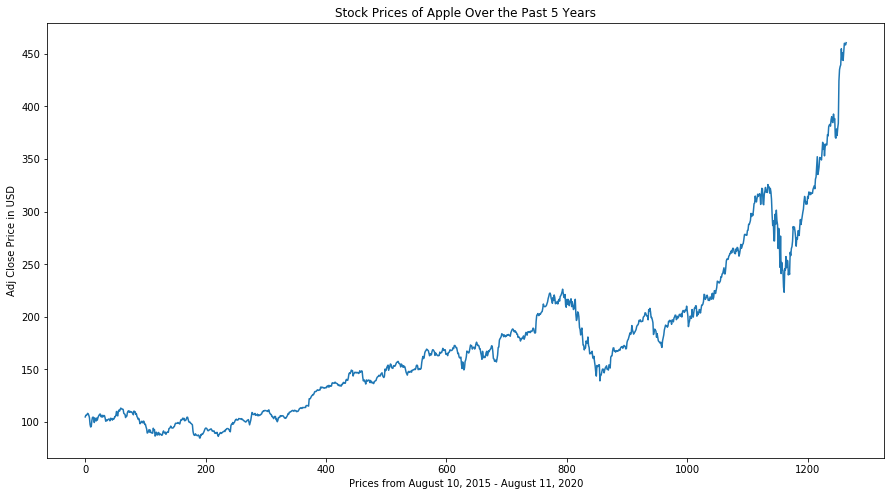

In [24]:
plt.figure(figsize = (15,8))
plt.plot(apple_chart['Adj Close'])
plt.title('Stock Prices of Apple Over the Past 5 Years')
plt.xlabel('Prices from August 10, 2015 - August 11, 2020')
plt.ylabel('Adj Close Price in USD')
plt.show()

In [25]:
#Create a simple moving average with a 30 day window
SMA_30 = pd.DataFrame()
SMA_30['Adj_Close_Price'] = apple_chart['Adj Close'].rolling(window = 30).mean()
SMA_30

,Adj_Close_Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1260,398.429107
1261,401.648618
1262,404.854462
1263,407.696223


In [26]:
# Short moving average for 100 days
SMA_100 = pd.DataFrame()
SMA_100['Adj_close_price'] = apple_chart['Adj Close'].rolling(window = 100).mean()
SMA_100

,Adj_close_price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1260,331.501392
1261,333.868177
1262,336.006773
1263,338.146908


In [27]:
# Create a dataframe of all adj close prices
data = pd.DataFrame()
data['Date'] = apple_chart['Date']
data['AAPL_adj_close'] = apple_chart['Adj Close']
data['SMA_30'] = SMA_30['Adj_Close_Price']
data['SMA_100']= SMA_100['Adj_close_price']
data

,Date,AAPL_adj_close,SMA_30,SMA_100
0,2015-08-11,104.877724,NaN,NaN
1,2015-08-12,106.494896,NaN,NaN
2,2015-08-13,106.411743,NaN,NaN
3,2015-08-14,107.160263,NaN,NaN
4,2015-08-17,108.269211,NaN,NaN
...,...,...,...,...
1260,2020-08-12,452.040000,398.429107,331.501392
1261,2020-08-13,460.040000,401.648618,333.868177
1262,2020-08-14,459.630000,404.854462,336.006773
1263,2020-08-17,458.430000,407.696223,338.146908


In [28]:
#Create a Function to signal when to buy and sell
def buy_sell(data):
    sig_price_buy = []
    sig_price_sell = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA_30'][i] > data['SMA_100'][i]:
            if flag != 1:
                sig_price_buy.append(data['AAPL_adj_close'][i])
                sig_price_sell.append(np.nan)
                #print(data['Date'][i])
                flag = 1
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)
        elif data['SMA_30'][i] < data['SMA_100'][i]:
            if flag !=0:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(data['AAPL_adj_close'][i])
                #print(data['Date'][i])
                flag = 0
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)
        else:
            sig_price_buy.append(np.nan)
            sig_price_sell.append(np.nan)
            
    return (sig_price_buy, sig_price_sell)

In [29]:
#store the buy and sell data into a variable

buy_sell = buy_sell(data)
data['buy_signal_price'] = buy_sell[0]
data['sell_signal_price']=buy_sell[1]

In [30]:
#Looking for the dates of the buy signals
buy_dates = data.loc[data['buy_signal_price']>0]
buy_dates

,Date,AAPL_adj_close,SMA_30,SMA_100,buy_signal_price,sell_signal_price
99,2015-12-31,97.688629,105.309006,105.214290,97.688629,NaN
166,2016-04-08,101.391273,97.869110,97.514481,101.391273,NaN
252,2016-08-10,101.938248,94.470048,94.122502,101.938248,NaN
651,2018-03-13,174.193893,164.950839,164.833587,174.193893,NaN
691,2018-05-09,181.346710,166.664875,166.592702,181.346710,NaN
905,2019-03-18,184.756653,171.603329,171.539505,184.756653,NaN
1202,2020-05-20,318.655487,291.069304,289.823247,318.655487,NaN


In [31]:
#Looking for the dates of the sell signals
sell_dates = data.loc[data['sell_signal_price']>0]
sell_dates

,Date,AAPL_adj_close,SMA_30,SMA_100,buy_signal_price,sell_signal_price
100,2016-01-04,97.772148,104.939635,105.143235,NaN,97.772148
194,2016-05-18,88.771683,93.800981,93.854013,NaN,88.771683
647,2018-03-07,169.412445,163.770296,163.961494,NaN,169.412445
681,2018-04-25,158.397659,165.860226,166.040898,NaN,158.397659
827,2018-11-20,173.165588,203.879329,204.450560,NaN,173.165588
1162,2020-03-24,245.770386,282.436834,283.484213,NaN,245.770386


In [32]:
buy_dates.drop(columns = ['sell_signal_price', 'SMA_30', 'SMA_100'], inplace = True)
sell_dates.drop(columns = ['buy_signal_price', 'SMA_30', 'SMA_100'], inplace = True)
buy_dates, sell_dates

(            Date  AAPL_adj_close  buy_signal_price
 99    2015-12-31       97.688629         97.688629
 166   2016-04-08      101.391273        101.391273
 252   2016-08-10      101.938248        101.938248
 651   2018-03-13      174.193893        174.193893
 691   2018-05-09      181.346710        181.346710
 905   2019-03-18      184.756653        184.756653
 1202  2020-05-20      318.655487        318.655487,
             Date  AAPL_adj_close  sell_signal_price
 100   2016-01-04       97.772148          97.772148
 194   2016-05-18       88.771683          88.771683
 647   2018-03-07      169.412445         169.412445
 681   2018-04-25      158.397659         158.397659
 827   2018-11-20      173.165588         173.165588
 1162  2020-03-24      245.770386         245.770386)

In [33]:
# DF of dates with prices
dates = pd.concat([buy_dates, sell_dates],sort = True)
dates

,AAPL_adj_close,Date,buy_signal_price,sell_signal_price
99,97.688629,2015-12-31,97.688629,NaN
166,101.391273,2016-04-08,101.391273,NaN
252,101.938248,2016-08-10,101.938248,NaN
651,174.193893,2018-03-13,174.193893,NaN
691,181.346710,2018-05-09,181.346710,NaN
905,184.756653,2019-03-18,184.756653,NaN
1202,318.655487,2020-05-20,318.655487,NaN
100,97.772148,2016-01-04,NaN,97.772148
194,88.771683,2016-05-18,NaN,88.771683
647,169.412445,2018-03-07,NaN,169.412445


In [34]:
# Now to organize by the dates, drop adj_close price column, and make date the index
dates.sort_values(by = 'Date', inplace = True)
#dates.drop(columns = ['AAPL_adj_close'],inplace = True)
dates.set_index('Date', inplace = True)
dates

,AAPL_adj_close,buy_signal_price,sell_signal_price
Date,,,
2015-12-31,97.688629,97.688629,NaN
2016-01-04,97.772148,NaN,97.772148
2016-04-08,101.391273,101.391273,NaN
2016-05-18,88.771683,NaN,88.771683
2016-08-10,101.938248,101.938248,NaN
2018-03-07,169.412445,NaN,169.412445
2018-03-13,174.193893,174.193893,NaN
2018-04-25,158.397659,NaN,158.397659
2018-05-09,181.346710,181.346710,NaN


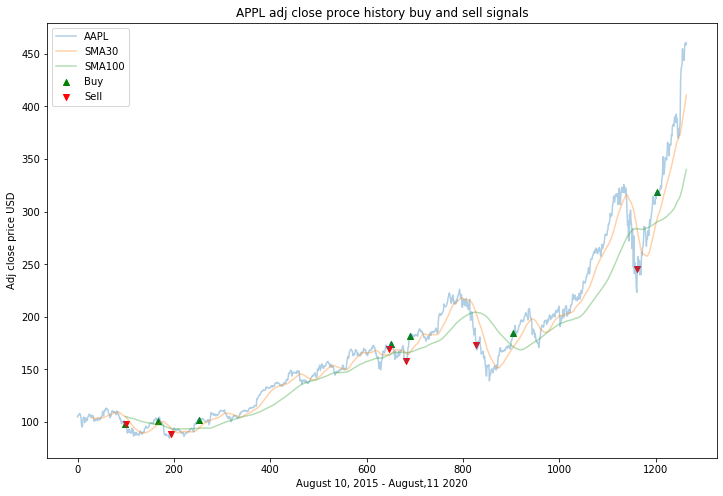

            AAPL_adj_close  buy_signal_price  sell_signal_price
Date                                                           
2015-12-31       97.688629         97.688629                NaN
2016-01-04       97.772148               NaN          97.772148
2016-04-08      101.391273        101.391273                NaN
2016-05-18       88.771683               NaN          88.771683
2016-08-10      101.938248        101.938248                NaN
2018-03-07      169.412445               NaN         169.412445
2018-03-13      174.193893        174.193893                NaN
2018-04-25      158.397659               NaN         158.397659
2018-05-09      181.346710        181.346710                NaN
2018-11-20      173.165588               NaN         173.165588
2019-03-18      184.756653        184.756653                NaN
2020-03-24      245.770386               NaN         245.770386
2020-05-20      318.655487        318.655487                NaN


In [35]:
#visualize data and strategy to buy and sell stock
plt.figure(figsize=(12,8))
plt.plot(data['AAPL_adj_close'],label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA_30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA_100'],label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['buy_signal_price'],label = 'Buy',marker = '^', color = 'green')
plt.scatter(data.index, data['sell_signal_price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('APPL adj close proce history buy and sell signals')
plt.xlabel('August 10, 2015 - August,11 2020')
plt.ylabel('Adj close price USD')
plt.legend()
plt.show()
print(dates)

### There is a small change in our graph and we see the averages have not crossed yet